In [1]:
%matplotlib notebook

In [2]:
from bp.section1_video5_data import get_data

In [3]:
from sklearn import model_selection

In [4]:
from sklearn.feature_selection import SelectFromModel

In [6]:
from xgboost import XGBClassifier, plot_importance

In [7]:
from matplotlib import pyplot

In [8]:
from numpy import sort

In [9]:
seed=123

In [10]:
X, Y = get_data('data/video1_diabetes.csv')

In [11]:
c = XGBClassifier(random_state=seed)

In [12]:
c.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<IPython.core.display.Javascript object>


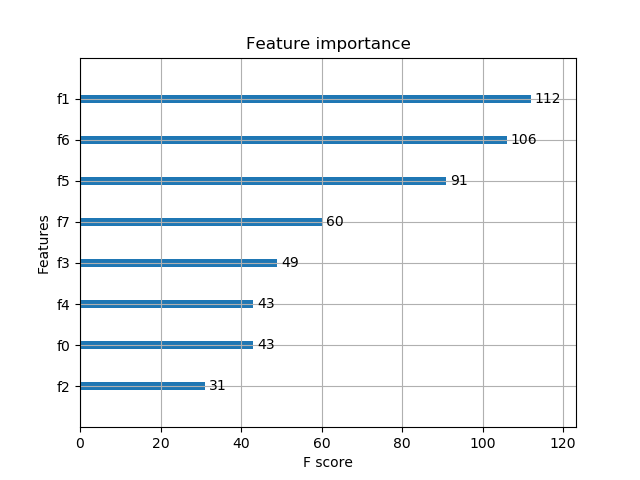

In [17]:
plot_importance(c)
pyplot.show()

In [18]:
c.feature_importances_

array([0.10324381, 0.28387424, 0.0503612 , 0.07052912, 0.08730716,
       0.1646962 , 0.08468229, 0.155306  ], dtype=float32)

In [19]:
fi=sort(c.feature_importances_)

In [20]:
fi

array([0.0503612 , 0.07052912, 0.08468229, 0.08730716, 0.10324381,
       0.155306  , 0.1646962 , 0.28387424], dtype=float32)

In [21]:
for f in fi:
    selected_model = SelectFromModel(c, threshold=f, prefit=True)
    selected_X = selected_model.transform(X)
    selected_c = XGBClassifier(random_state=seed)
    selected_c.fit(selected_X, Y)
    kfold=model_selection.cross_val_score(selected_c, selected_X, Y, cv=10)
    print("{} {}".format(f, kfold.mean()*100))

0.05036119744181633 71.66666666666666
0.07052911818027496 70.92592592592594
0.08468229323625565 72.6139601139601
0.0873071625828743 72.61396011396012
0.10324380546808243 73.38319088319088
0.15530599653720856 70.02849002849003
0.16469620168209076 67.21509971509973
0.2838742434978485 69.26638176638177
